[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rikkicasupanan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


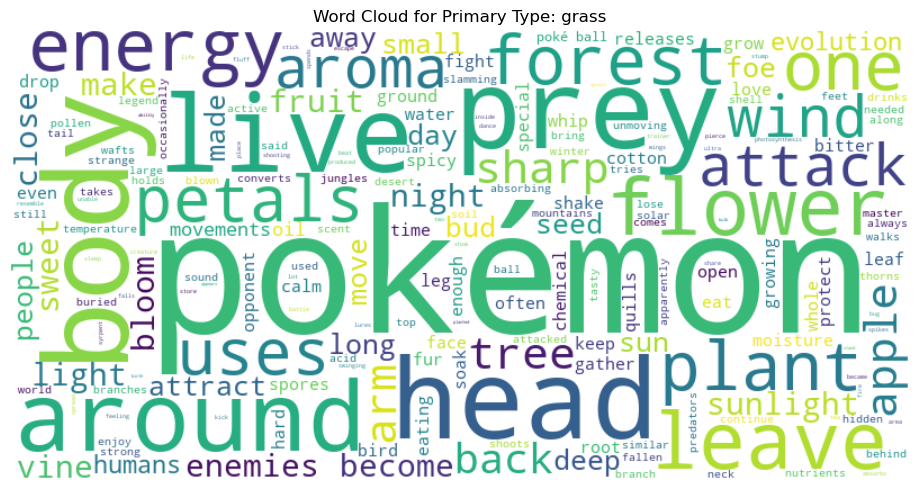

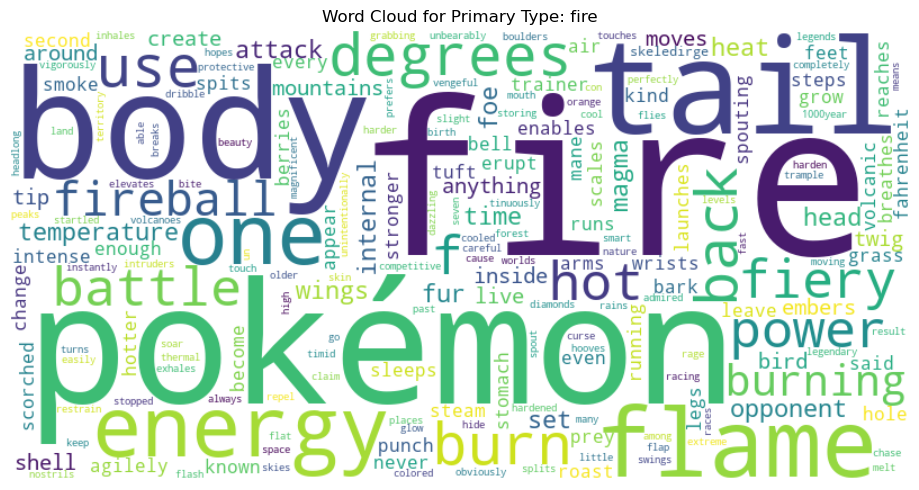

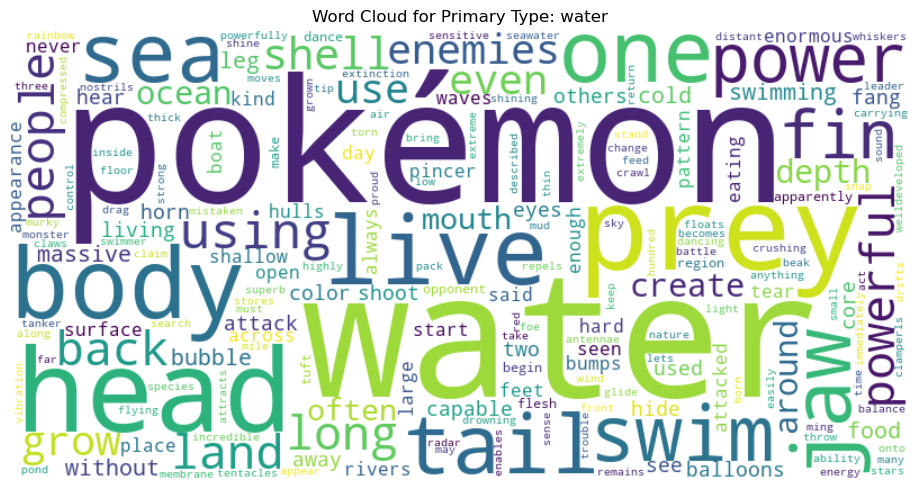

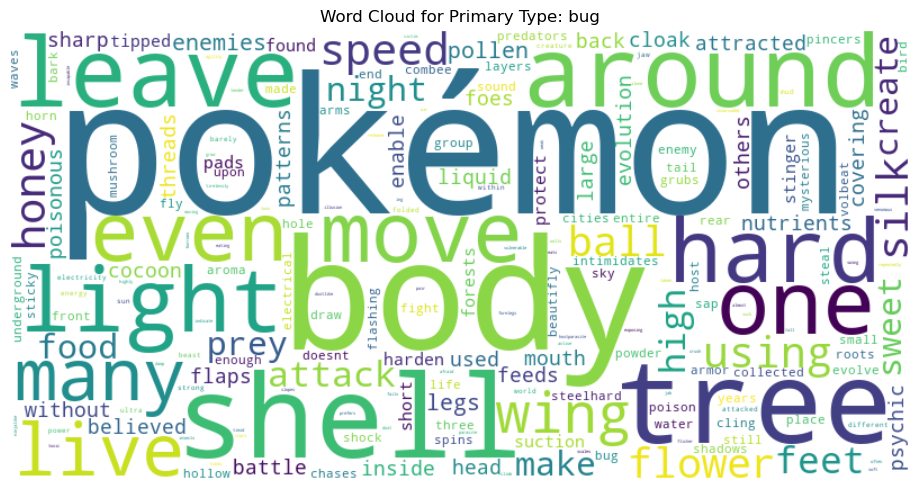

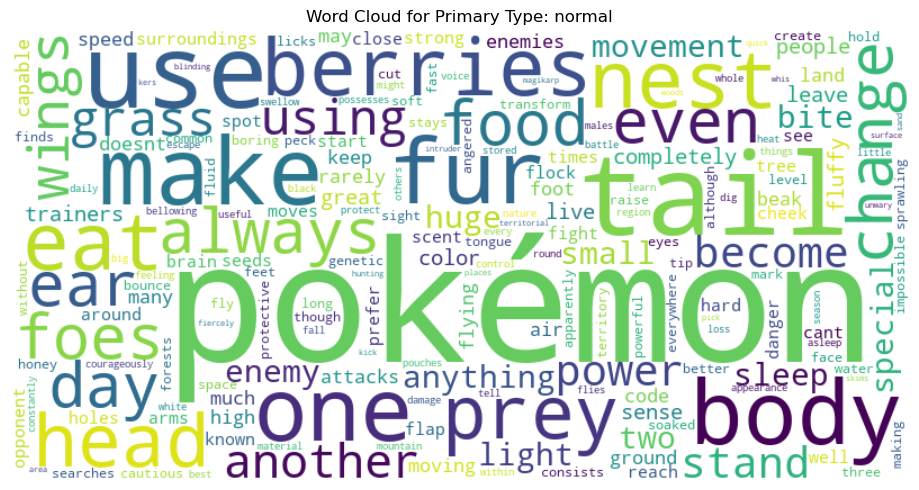

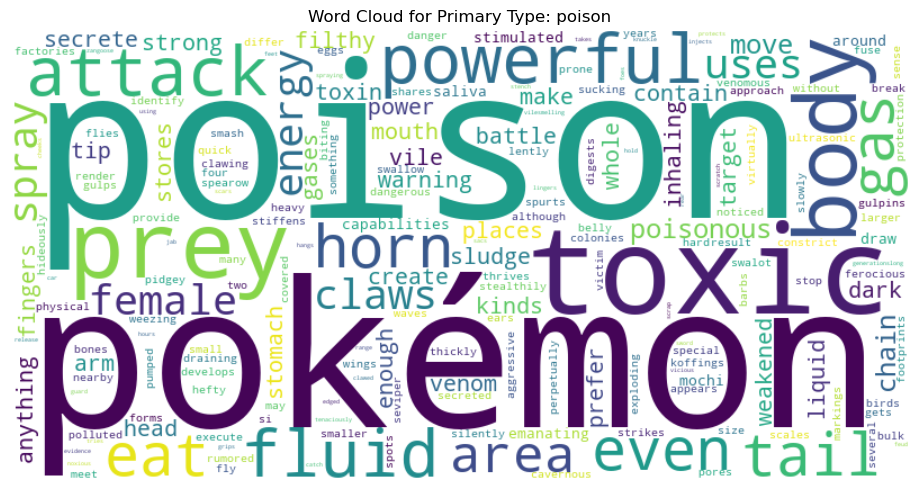

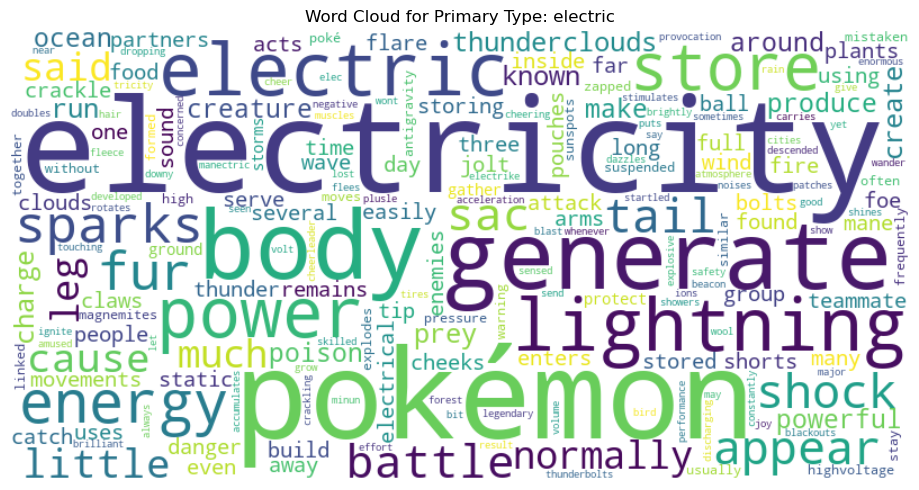

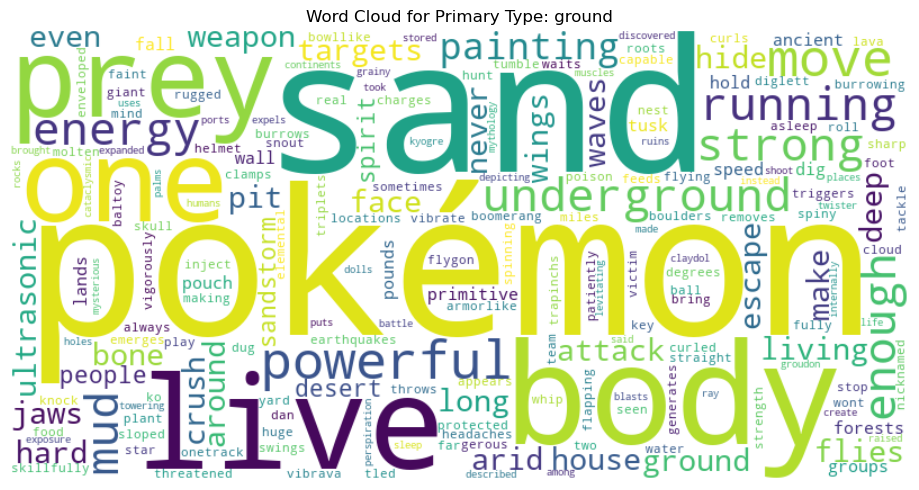

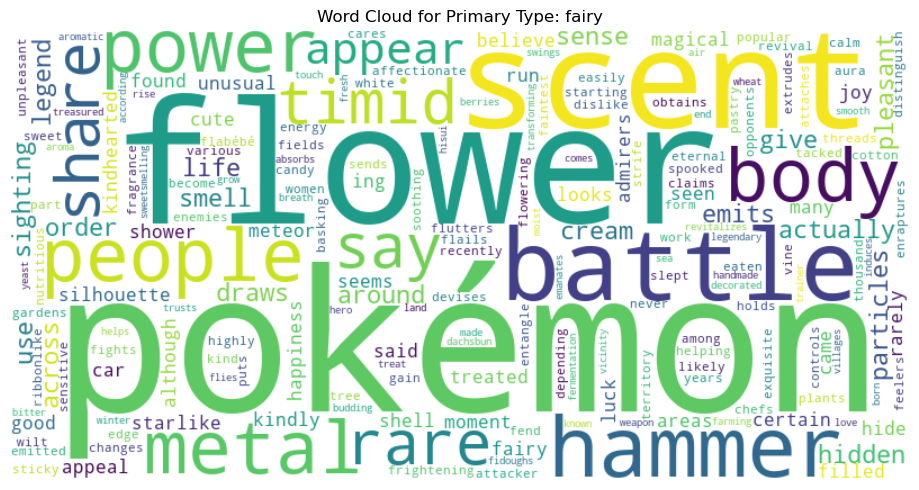

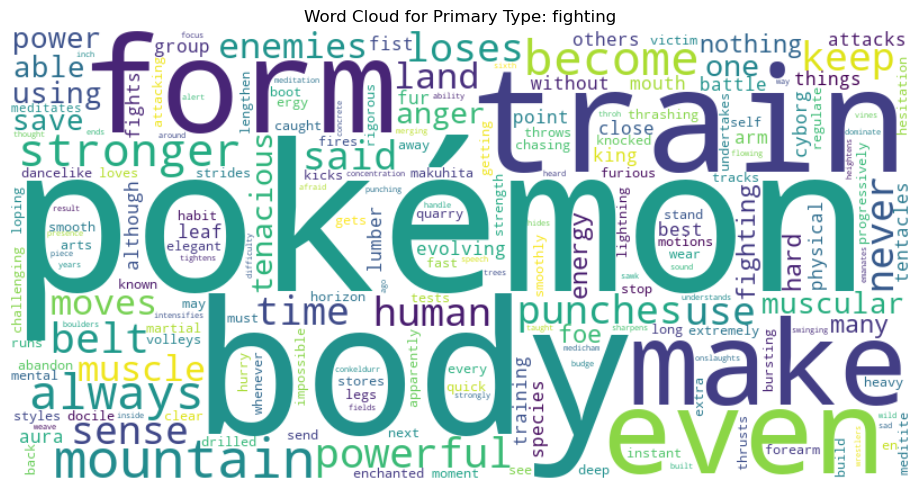

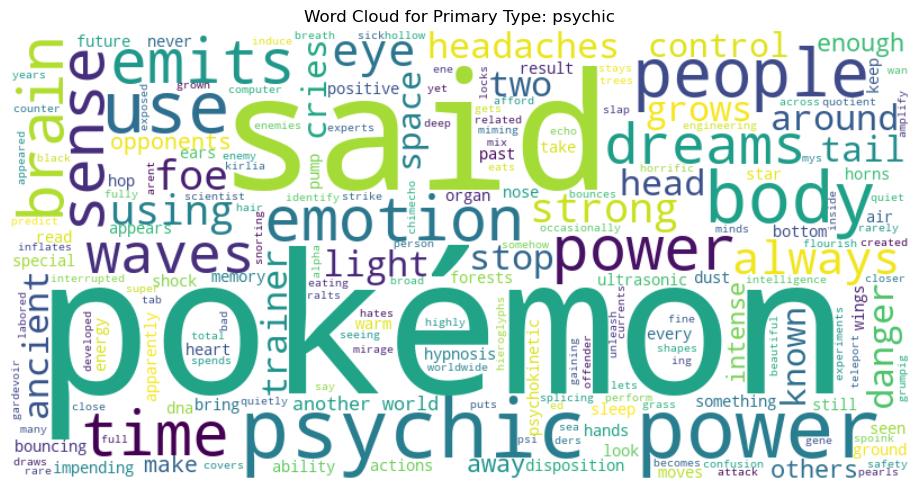

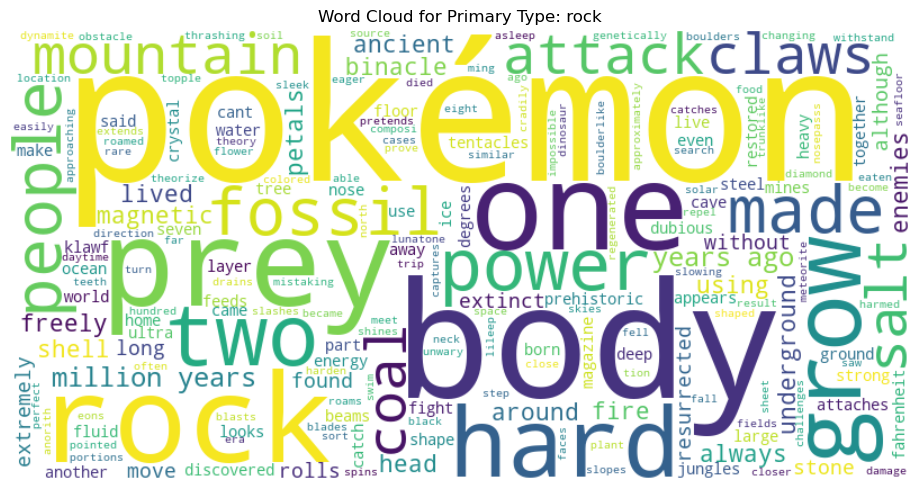

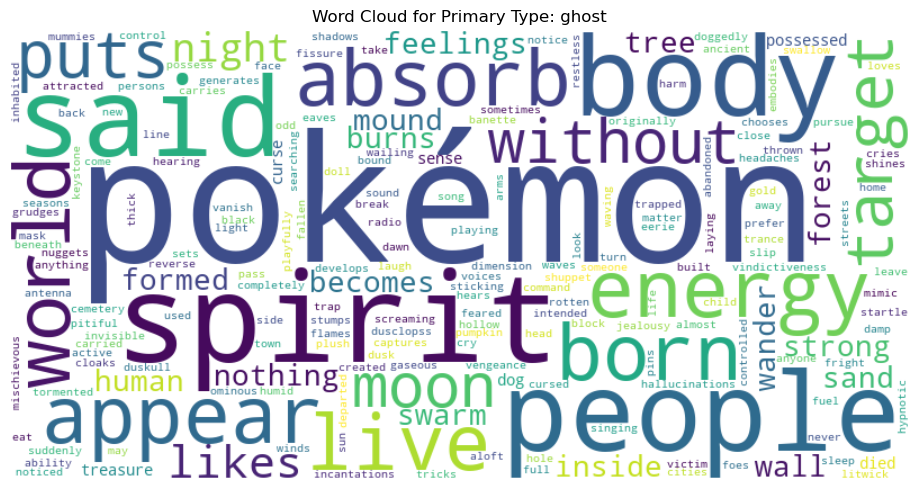

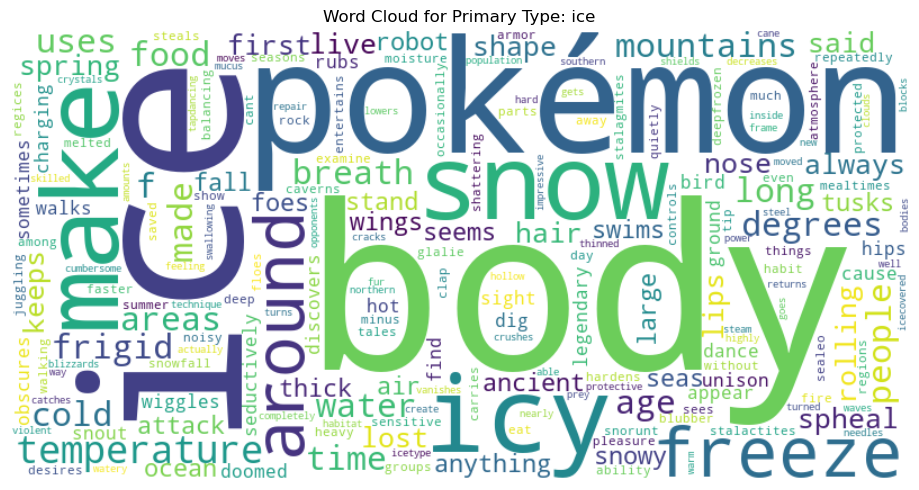

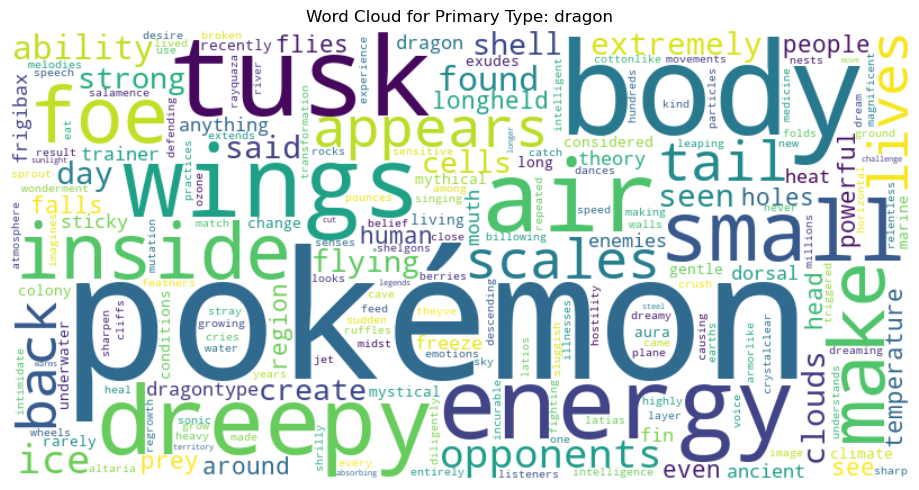

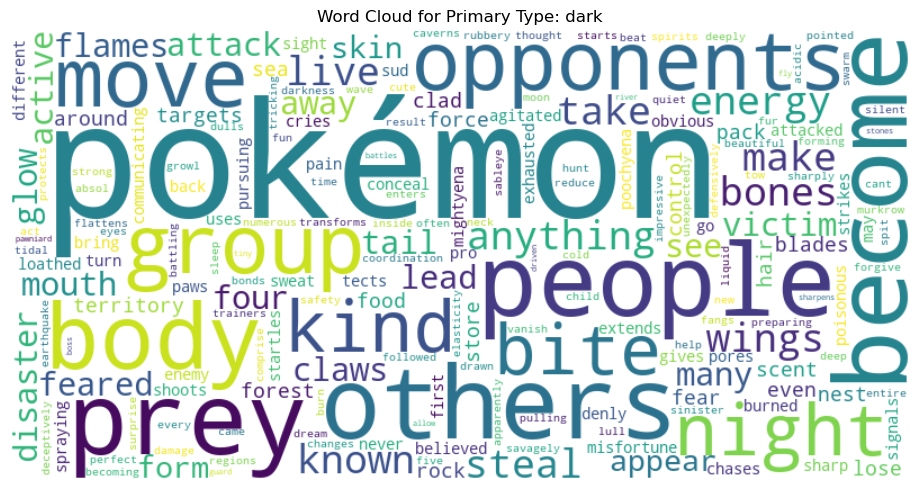

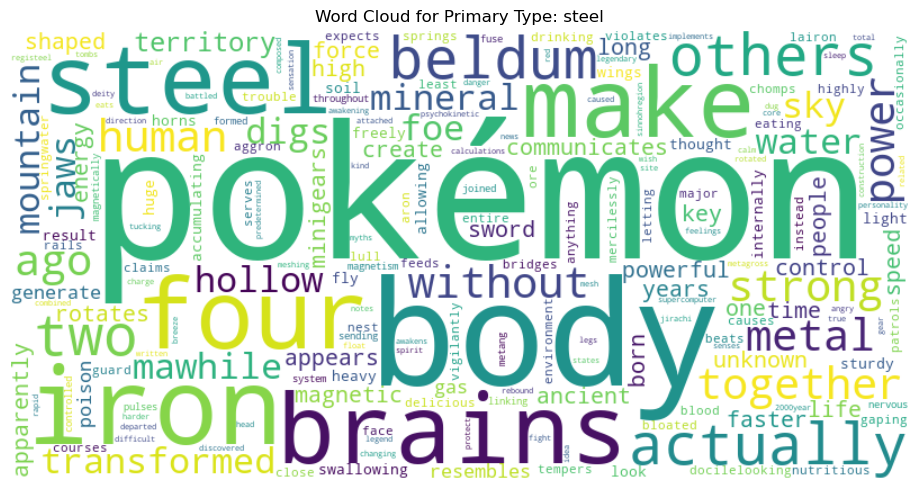

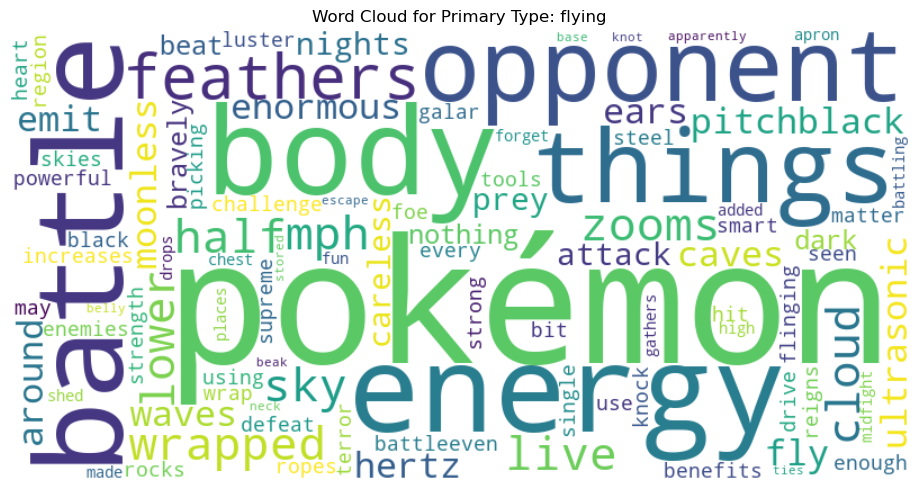


🔹 Top 15 Words in Mono-Type Descriptions:
pokémon: 142
body: 87
power: 35
tail: 32
water: 32
prey: 29
head: 25
one: 24
around: 24
even: 23
pokémons: 23
using: 22
energy: 22
people: 21
long: 19

🔹 Top 15 Words in Dual-Type Descriptions:
pokémon: 177
body: 76
prey: 40
one: 36
people: 34
energy: 30
wings: 29
around: 29
said: 28
head: 24
water: 24
power: 23
enemies: 21
uses: 20
poison: 20


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
df = pd.read_csv('../pokedex_with_type_count.csv')

# Split into type1 and type2
df[['type1', 'type2']] = df['type_clean'].str.split(',', n=1, expand=True)
df['type2'] = df['type2'].where(df['type2'].notnull(), None)

# Clean text: lowercase and remove punctuation
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return ' '.join(word for word in text.split() if word not in stop_words)

df['info_cleaned'] = df['info'].apply(clean_text)

# -----------------------------
# 1. Word Cloud by Primary Type
# -----------------------------
unique_types = df['type1'].unique()

for t in unique_types:
    text = ' '.join(df[df['type1'] == t]['info_cleaned'].dropna())
    if text.strip():  # skip empty ones
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Primary Type: {t}")
        plt.tight_layout()
        plt.show()

# -------------------------------------
# 2. Frequency Analysis: Mono vs Dual
# -------------------------------------
# Convert type_count to binary classification
df['is_dual'] = df['type_count'].apply(lambda x: 1 if x == 'Dual' else 0)

# Tokenize text by Mono vs Dual
mono_words = ' '.join(df[df['is_dual'] == 0]['info_cleaned']).split()
dual_words = ' '.join(df[df['is_dual'] == 1]['info_cleaned']).split()

mono_freq = Counter(mono_words)
dual_freq = Counter(dual_words)

# Top 15 words for each category
print("\n🔹 Top 15 Words in Mono-Type Descriptions:")
for word, count in mono_freq.most_common(15):
    print(f"{word}: {count}")

print("\n🔹 Top 15 Words in Dual-Type Descriptions:")
for word, count in dual_freq.most_common(15):
    print(f"{word}: {count}")


